# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

Devemos determinar qual dos dois planos pré-pagos hoje utilizados pela Megaline, Surf ou Ultimate, gera mais receita para atender ao pedido do departamento de marketing de ajuste do orçamento de relações públicas. Estudaremos o comportamento do cliente usando uma amostra de 500 usuários coletada de 1º de janeiro de 2018 a 31 de dezembro de 2018. Idade, cidade, número e duração das chamadas, duração das sessões de internet e número de mensagens de texto usadas por cada usuário estão incluídos na amostra. 

O cálculo da receita de uso e das estatísticas descritivas da população de usuários é necessário para se chegar a uma conclusão sobre a atividade de um plano para a empresa. Calcular as quantidades de elementos do plano que cada usuário utiliza, retirar a restrição de inclusão do plano, limitar o uso do exedente e adicionar um valor mensal definido são os próximos passos. 

Depois de fazer isso, começaremos a examinar a média, a distribuição e quais conclusões podemos tirar das duas populações. Dadas as nossas conclusões quanto ao comportamento histórico dos usuários de ambos os planos, testaremos as duas hipóteses a seguir:

**Hipótese 1**

*A receita média gerada pelos usuários dos planos Ultimate e Surf é diferente.*

**Hipótese 2**

*Os usuários da região NY-NJ têm uma receita média diferente dos usuários de outras regiões.*

**Ações a serem tomadas:**

* Revisar a estrutura dos dataframes.
* Modificar os dataframes conforme necessário (exemplo de tipo de dados em cada coluna).
* Por ter várias tabelas com dados diferentes em cada uma, é necessário unificar todas as informações em uma única  tabela que permite fazer mais facilmente os cálculos tendo as informações de cada usuário, de acordo com seu plano, para cada mês que o serviço foi contratado.
* Fazer uma análise através de gráficos para observar o comportamento de cada plano.
* Conferir as hipóteses estabelecidas pela Megaline.

Por fim, descreveremos as nossas conclusões relativamente à eficácia de ambos os planos e faremos uma recomendação ao departamento de marketing sobre em qual plano devem concentrar os seus esforços e concentrar o orçamento de relações públicas.

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Carregamento dos dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv', parse_dates=True)
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv', parse_dates=True)
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv', parse_dates=True)

## Preparação dos dados

Os dados fornecidos serão organizados em várias tabelas e examinaremos cada fonte de dados individualmente.

## Planos

**A tabela `plans` (dados sobre os planos):**

* `plan_name` — o nome do plano de chamadas, tipo object, categórica
* `usd_monthly_fee` — preço mensal em dólares americanos, tipo int, numérico
* `minutes_included` — pacote de minutos mensal, tipo int, numérico
* `messages_included` — pacote de mensagens de texto mensal, tipo int, numérico
* `mb_per_month_included` — pacote de volume de dados (em megabytes), 
* `usd_per_minute` — preço por minuto depois de exceder o limite do pacote (por exemplo, se o pacote inclui 100 minutos, o primeiro minuto excedente será cobrado), tipo float, numérico
* `usd_per_message` — preço por mensagem de texto depois de exceder o limite do pacote, tipo float, numérico
* `usd_per_gb` — preço por gigabyte extra de dados após exceder o limite do pacote (1 GB = 1.024 MB), tipo int, numérico

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_plans.info()
df_plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
# Imprima uma amostra de dados dos planos
seed_planos = 2
amostra_planos = df_plans.sample(seed_planos)
amostra_planos

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


O dataframe que contém as informações do plano:

Há 8 colunas com 2 linhas, não possui dados nulos. Contém informações sobre a quantidade de dados, minutos e mensagens oferecidas. Contém os custos "unitários" para gigabytes, mensagens e minutos quando um limite de pacotes é excedido. E a coluna `usd_monthly_pay` está com o nome errado, é preciso renomear a coluna para `usd_monthly_fee`.

## Correção dos dados

In [6]:
df_plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace = True)

In [7]:
# Transformando mb_per_month_included para gb_per_month_included
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

In [8]:
# reordenando colunas
new_order = ['plan_name', 'usd_monthly_fee', 'gb_per_month_included', 'usd_per_gb', 'minutes_included', 'usd_per_minute', 'messages_included', 'usd_per_message', 'mb_per_month_included']
df_plans = df_plans[new_order]

In [9]:
df_plans.head()

,plan_name,usd_monthly_fee,gb_per_month_included,usd_per_gb,minutes_included,usd_per_minute,messages_included,usd_per_message,mb_per_month_included
0,surf,20,15.0,10,500,0.03,50,0.03,15360
1,ultimate,70,30.0,7,3000,0.01,1000,0.01,30720


In [10]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   plan_name              2 non-null      object 
 1   usd_monthly_fee        2 non-null      int64  
 2   gb_per_month_included  2 non-null      float64
 3   usd_per_gb             2 non-null      int64  
 4   minutes_included       2 non-null      int64  
 5   usd_per_minute         2 non-null      float64
 6   messages_included      2 non-null      int64  
 7   usd_per_message        2 non-null      float64
 8   mb_per_month_included  2 non-null      int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


**Overview**

- Poucos ajustes no df_plans devido ao dataset ser apenas sobre as informações dos 2 únicos planos disponíveis.

## Enriquecimento dos dados

Os dados fornecidos já são suficientes para fazer a análise.

## Usuários

**A tabela `users` (dados sobre usuários):**

* `user_id` — o identificador do usuário, tipo object, categórica 
* `first_name` — nome do usuário, tipo object, categôrica
* `last_name`— último sobrenome do usuário, tipo object, categórica
* `age` — idade do usuário (em anos), tipo int, categôrica
* `reg_date`— data da inscrição (dd, mm, aa), tipo datetime, numérica
* `churn_date` — a data que o usuário parou de usar o serviço (se o valor for ausente, o plano estava em uso quando esses dados foram gerados), tipo datetime, numérica
* `city` — cidade de residência do usuário, tipo object, categôrica
* `plan` — nome do plano, tipo object, categôrica

In [11]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users.info()
df_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [12]:
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [13]:
# Imprima uma amostra de dados dos usuários
seed_usuarios = 50
amostra_usuarios = df_users.sample(frac=0.1, random_state=seed_usuarios)
amostra_usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
331,1331,Lashandra,Ramos,54,"Dallas-Fort Worth-Arlington, TX MSA",2018-02-06,surf,NaN
374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaN
434,1434,Kai,Barr,18,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-03-06,surf,NaN
354,1354,Leonel,Dyer,41,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-24,ultimate,NaN
345,1345,Pasquale,Caldwell,26,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-12,surf,NaN
441,1441,Piedad,Myers,23,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-08,ultimate,2018-08-19
259,1259,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,surf,NaN
181,1181,Ron,Kaufman,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-13,surf,NaN
456,1456,Seymour,Olsen,66,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-02,ultimate,NaN
290,1290,Thaddeus,Compton,33,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-14,surf,NaN


In [14]:
df_users.duplicated().sum()

0

In [15]:
df_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [16]:
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [17]:
df_users.churn_date.isna().sum()

466

### Criando coluna exited em df_users.

In [18]:
# Criando coluna exited
df_users['exited'] = np.where(df_users['churn_date'].isna(), 0, 1)

# verificando...
df_users.loc[df_users['exited'] == 1].count()

user_id       34
first_name    34
last_name     34
age           34
city          34
reg_date      34
plan          34
churn_date    34
exited        34
dtype: int64

In [19]:
# Calculando a proporção de clientes com evasão
total_clientes = df_users.shape[0]
exited_clientes = df_users['exited'].loc[df_users['exited'] == 1].count()
evasion = (exited_clientes / total_clientes) * 100
print(round(evasion, 2),f'% dos {total_clientes} clientes sofreram churn.')

6.8 % dos 500 clientes sofreram churn.


### Resolvendo churn_date

In [20]:
df_users['churn_date'] = df_users['churn_date'].fillna("not exited")

In [21]:
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,exited
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,not exited,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,not exited,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,not exited,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,not exited,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,not exited,0
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,not exited,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,not exited,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,not exited,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,not exited,0


### Realizaremos as análises com user_id. Remoção das colunas first_name e last_name.

In [22]:
# removendo com drop
df_users = df_users.drop(['first_name', 'last_name'], axis=1)

# conferindo
df_users.head()

,user_id,age,city,reg_date,plan,churn_date,exited
0,1000,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,not exited,0
1,1001,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,not exited,0
2,1002,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,not exited,0
3,1003,52,"Tulsa, OK MSA",2018-01-28,surf,not exited,0
4,1004,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,not exited,0


In [23]:
# reorganizando colunas
new_order = ['user_id', 'plan', 'exited', 'age', 'city', 'reg_date', 'churn_date']
df_users = df_users[new_order]
df_users.head()

,user_id,plan,exited,age,city,reg_date,churn_date
0,1000,ultimate,0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,not exited
1,1001,surf,0,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,not exited
2,1002,surf,0,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,not exited
3,1003,surf,0,52,"Tulsa, OK MSA",2018-01-28,not exited
4,1004,surf,0,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,not exited


O dataframe que contém as informações do usuário:

Possui 34 valores faltantes na coluna churn_date, porém, esses valores faltantes são porque o plano desses usuários ainda estava ativo no momento do corte das informações. As colunas reg_date e churn_date são formatadas como objeto em vez de data e hora. Vamos usar o campo `user_id` como o identificator primário do usuário.

### Correção dos dados

In [24]:
df_users.reg_date = pd.to_datetime(df_users.reg_date, format='%Y-%m-%d')
df_users.churn_date = pd.to_datetime(df_users.churn_date, format='%Y-%m-%d', errors="coerce")

In [25]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   plan        500 non-null    object        
 2   exited      500 non-null    int64         
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 27.5+ KB


### Enriquecimento dos dados

In [26]:
df_users['reg_mes'] = df_users['reg_date'].dt.strftime('%m')

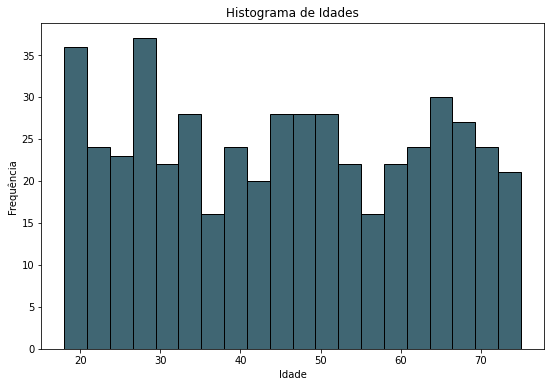

In [27]:
# distribuição de idades dos usuários
plt.figure(figsize=(9, 6))
sns.histplot(data=df_users, x='age', bins=20, color="#003344", edgecolor='k')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idades')
plt.show()

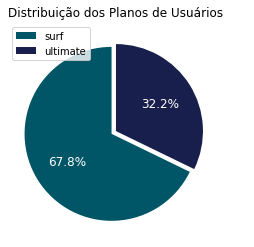

In [28]:
# gráfico informativo dos planos
plan_counts = df_users['plan'].value_counts()
colors = ["#005666", "#181f4c"]
labels = plan_counts.index
sizes = plan_counts.values

explode = (0.06, 0)
 
fig, ax = plt.subplots()
ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    textprops={'color': 'white', 'fontsize': 12}
)

plt.title('Distribuição dos Planos de Usuários')
plt.legend(loc="best", labels=labels)
plt.show()

### Agrupamemnto para gerar insights.

In [29]:
# informações sobre idade dos usuários por planos
df_users_grouped = df_users.groupby(['plan'])['age'].agg(['mean', 'median'])
df_users_grouped

,mean,median
plan,,
surf,44.952802,45
ultimate,46.608696,48


In [30]:
# usuários que sofreram churn e suas idades...
df_users_grouped = df_users.groupby(['exited'])['age'].agg(['mean', 'median'])
df_users_grouped

,mean,median
exited,,
0,45.476395,46
1,45.617647,46


In [31]:
df_users.head()

,user_id,plan,exited,age,city,reg_date,churn_date,reg_mes
0,1000,ultimate,0,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,NaT,12
1,1001,surf,0,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,NaT,08
2,1002,surf,0,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,NaT,10
3,1003,surf,0,52,"Tulsa, OK MSA",2018-01-28,NaT,01
4,1004,surf,0,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,NaT,05


In [32]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   plan        500 non-null    object        
 2   exited      500 non-null    int64         
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   churn_date  34 non-null     datetime64[ns]
 7   reg_mes     500 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 31.4+ KB


**Overview**

- Nosso df_users tem informações de 500 usuários
- São apenas 2 planos disponíveis para os usuários neste dataset
- Média de idade dos usuários é de 45 com idades mínimas e máximas entre 18 e 75 anos
- Única coluna com valores Nan é churn_date, onde há apenas informação da data de saída dos usuários que cancelaram, aqueles que continuam ativos apareceram como Nan
- Não haviam dados duplicados no dataset
- Realizamos a transformaçãoda coluna reg_date para formato to_datetime
- Criamos uma coluna binária chamada exited, onde os usuários que cancelaram o plano receberam o valor de 1 e os demais 0
- Calculamos a taxa de churn que ficou em 6,8%
- Decidimos por remover os nomes dos usuários para trabalharmos apenas com os ids
- O plano Surf tem o dobro de usuários do que o plano Ultimate
- Tanto a média de idade dos usuários em cada plano, quando a média dos usuários que sofreram churn, estão muito próximas da idade média do dataset inteiro


## Chamadas

**A tabela `calls` (dados sobre as chamadas):**

* `id` — identificador de chamada unívoco, tipo object
* `call_date` — data da chamada, tipo datetime, numérico
* `duration` — duração da chamada (em minutos), tipo float, numérico
* `user_id` — o identificador do usuário que faz a chamada, tipo object, categórica

In [33]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
df_calls.info()
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [34]:
display(df_calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [35]:
# Imprima uma amostra de dados das chamadas
seed_chamadas = 50
amostra_chamadas = df_calls.sample(frac=0.1, random_state=seed_chamadas)
amostra_chamadas

,id,user_id,call_date,duration
3930,1016_232,1016,2018-11-08,4.66
51835,1187_28,1187,2018-06-20,2.70
49525,1179_184,1179,2018-07-28,2.71
22344,1082_336,1082,2018-12-27,0.00
99384,1357_55,1357,2018-07-03,13.02
...,...,...,...,...
25748,1099_66,1099,2018-02-27,12.19
84533,1312_25,1312,2018-09-22,3.62
16054,1062_294,1062,2018-11-22,0.73
28017,1106_365,1106,2018-09-24,0.00


Todas as colunas, exceto `call_date`, não possuem valores vazios. A coluna `call_date` com tipo de string de dados deve ser alterado para tipo de data e hora. E a coluna `user_id` com tipo de inteiro de dados deve ser alterado para object. A duração da chamada é expressa em minutos e segundos. De acordo com as regras do plano, devemos arrendondar para cima.

### Correção dos dados

In [36]:
df_calls.call_date = pd.to_datetime(df_calls.call_date, format='%Y-%m-%d')

In [37]:
df_calls.convert_dtypes(infer_objects = False).dtypes
df_calls['user_id'] = df_calls['user_id'].astype('object')

len(df_calls.user_id.value_counts().sort_index())

481

Há 481 identificadores únicos ids dos clientes, ou seja, 11 usuários não usavam as chamadas dentro do período estudado.

### Tratamento dos dados de df_calls.

In [38]:
# Verificando a quantidade de chamadas com 0 segundos
df_calls_zero = df_calls.loc[ df_calls['duration'] == 0].count()
df_calls_zero.head()

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

In [39]:
# Calculando proporção
dimension = df_calls_zero / df_calls.shape[0]
print(f'A proporção de chamadas com ZERO segundos no df_calls é de : {round(dimension[0], 4) * 100} %')

A proporção de chamadas com ZERO segundos no df_calls é de : 19.48 %


In [40]:
# Retirando as chamadas com zero segundos
df_calls = df_calls[df_calls['duration'] != 0]

In [41]:
# verificando
df_calls.shape

(110901, 4)

### Enriquecimento dos dados

A duração da chamada é expressa em minutos e segundos. De acordo com as regras do plano, devemos arrendondar para cima. Adicionaremos uma coluna chamada `duration_min` onde a duração da chamada será expressa em minutos completos.

In [42]:
df_calls['duration_min'] = np.ceil(df_calls['duration'])
df_calls[['duration_min', 'duration']].head()

,duration_min,duration
0,9.0,8.52
1,14.0,13.66
2,15.0,14.48
3,6.0,5.76
4,5.0,4.22


Iremos somar as duração de chamadas por mês, precisamos adicionar a coluna `month`.

In [43]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.month.head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [44]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            110901 non-null  object        
 1   user_id       110901 non-null  object        
 2   call_date     110901 non-null  datetime64[ns]
 3   duration      110901 non-null  float64       
 4   duration_min  110901 non-null  float64       
 5   month         110901 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.9+ MB


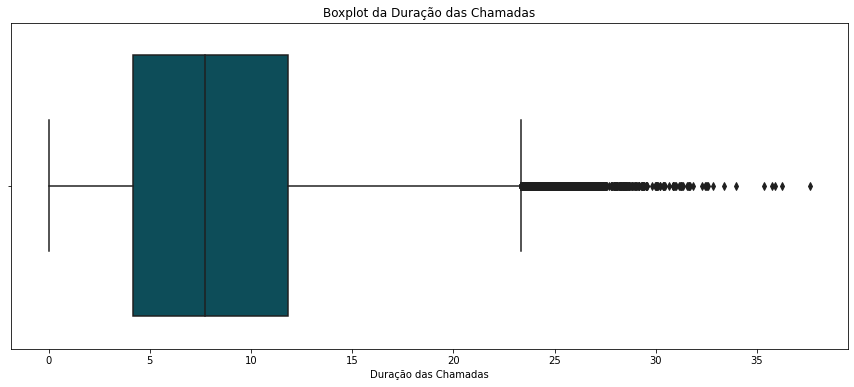

In [45]:
# boxplot do tempo de duração da chamadas
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_calls['duration'], color='#005666')
plt.xlabel('Duração das Chamadas')
plt.title('Boxplot da Duração das Chamadas')
plt.show()

**Overview**

- Bom volume de dados em df_calls
- Sem dados nulos e duplicados
- Média e mediana da duração das chamadas muito próximas
- Transformamos a coluna call_date para formato data e hora
- Contabilizamos as chamadas com 0 segundos e optamos por retirá-las do dataset
- Aproximadamente 20% do dataset tinha chamadas com 0 segundos
- Nenhuma chamada passou de 1 minuto, com a duração máxima em 37 segundos

## Mensagens

**A tabela `messages` (dados nas mensagens de texto):**

* `id` — identificador unívoco de mensagem de textos, tipo object
* `message_date` — data da mensagem de texto, tipo datatime, numérica
* `user_id` — o identificador do usuário que envia a mensagem de texto, tipo object, categórica


In [46]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_messages.info()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [47]:
display(df_messages)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [48]:
# Imprima uma amostra dos dados das mensagens
seed_mensagens = 50
amostra_mensagens = df_messages.sample(frac=0.1, random_state=seed_mensagens)
amostra_mensagens

,id,user_id,message_date
5486,1052_243,1052,2018-12-01
60852,1383_8,1383,2018-12-27
70609,1460_73,1460,2018-08-28
23278,1141_57,1141,2018-12-03
67307,1435_345,1435,2018-11-15
...,...,...,...
44864,1301_127,1301,2018-12-25
20521,1130_196,1130,2018-11-23
57181,1362_253,1362,2018-06-09
12709,1082_289,1082,2018-05-26


In [49]:
df_messages.duplicated().sum()

0

In [50]:
df_messages.value_counts().sum()

76051

In [51]:
df_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

Há 3 colunas com 76051 linhas, não há os valores ausentes. A coluna `message_date` com tipo de dados string deve que ser modificada para tipo de datetime. E a coluna `user_id` com tipo de dados inteiro deve ser modificada para tipo de dado object.

### Correção dos dados

In [52]:
df_messages.message_date = pd.to_datetime(df_messages.message_date, format='%Y-%m-%d')
len(df_messages.user_id.value_counts().sort_index())

402

Há 402 identificadores únicos ids dos clientes, ou seja, 98 usuários não enviaram mensagens dentro do período estudado.

In [53]:
df_messages.convert_dtypes(infer_objects = False).dtypes
df_messages['user_id'] = df_messages['user_id'].astype('object')

### Enriquecimento dos dados

Iremos somar a quantidade de mensagens por mês, precisamos adicionar a columa `month`. 

In [54]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.month.head()

0    12
1    12
2    12
3    12
4    12
Name: month, dtype: int64

In [55]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


**Overview de df_messages**

- Sem valores nulos ou duplicados em df_messages
- Transformamos a coluna 'message_date' em to_datetime
- Geramos um gráfico de quantidade de mensagens por usuário

## Internet

**A tabela `internet` (dados sobre sessões web):**

* `id` — identificador de sessão unívoco, object
* `mb_used` — o volume de dados gasto durante a sessão (em megabytes), tipo int, numérico
* `session_date` — data da sessão web, tipo datetime, numérico 
* `user_id` — identificador do usuário, tipo object, categórica

In [56]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet
df_internet.info()
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [57]:
display(df_internet)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [58]:
#  Imprima uma amostra de dados para o tráfego da internet
seed_internet = 50
amostra_internet = df_internet.sample(frac=0.1, random_state=seed_internet)
amostra_internet

,id,user_id,session_date,mb_used
86743,1403_91,1403,2018-04-04,807.32
43491,1193_414,1193,2018-07-09,0.00
84349,1392_317,1392,2018-11-16,325.80
70226,1328_185,1328,2018-12-19,155.08
57837,1261_299,1261,2018-07-26,775.39
...,...,...,...,...
1848,1009_383,1009,2018-09-06,328.39
99289,1467_426,1467,2018-10-04,510.39
25437,1117_370,1117,2018-12-01,0.00
24581,1113_183,1113,2018-08-31,0.00


Há 4 colunas com 104825 linhas cada. Não há os valores nulos. A coluna `session_date` com tipo de dados string deve que ser modificada para tipo de `datetime`. E a coluna `user_id ` com tipo de dados inteiro  deve ser modificada para tipo de dados `object`. Partindo da informação que a Megaline não arredonda para cima cada sessão da Internet, não vamos arredondar o valor nesse momento, voltando para esse assunto pós a calcular a média mensal.

### Correção dos dados

In [59]:
df_internet.session_date = pd.to_datetime(df_internet.session_date, format='%Y-%m-%d')

In [60]:
len(df_internet.user_id.value_counts().sort_index())

489

Há 489 identificadores únicos ids dos clientes, ou seja, 11 usuários não usavam a Internet dentro do período estudado

In [61]:
df_internet.duplicated().sum()

0

In [62]:
df_internet.value_counts().sum()

104825

In [63]:
df_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [64]:
df_mb_zero = df_internet.loc[df_internet['mb_used'] == 0].count()
df_mb_zero

id              13747
user_id         13747
session_date    13747
mb_used         13747
dtype: int64

In [65]:
relacao = df_mb_zero[0] / df_internet.shape[0]
print(f'A proporção de linhas com informações de 0 mb usados no df_internet é de: {(round(relacao, 4) * 100)} %')

A proporção de linhas com informações de 0 mb usados no df_internet é de: 13.11 %


In [66]:
# removendo do df_internet onde mb_used é zero
df_internet = df_internet[df_internet['mb_used'] != 0]

# verificando...
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


### Enriquecimento dos dados

Iremos somar o uso da internet por mês, precisamos adicionar a columa `month`.

In [67]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.month.head()

0    12
2    12
3    12
4    12
5     8
Name: month, dtype: int64

In [68]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
 4   month         91078 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.2+ MB


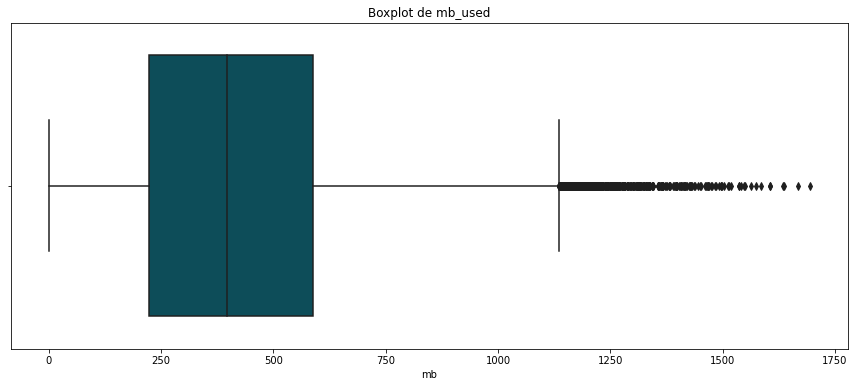

In [69]:
# boxplot de df_internet
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_internet['mb_used'], color='#005666')
plt.xlabel('mb')
plt.title('Boxplot de mb_used')
plt.show()

**Overview df_internet**

- Novamente sem duplicados e sem valores nulos
- Média e mediana de mb usados ficou em torno de 350 mb
- O maior uso de mb diário foi de 1693
- Existiam 13747 acessos com 0 mb usados, o qual representa 13% do dataset, eles foram removidos

## Estudo das condições dos planos

Vamos vizualizar as informações dos ambos planos para certificarmos que as regras ds limites inclusos no pagamento mensal e como acontece a cobrança de execedente após o uso do limite.

In [70]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
df_plans.head()

,plan_name,usd_monthly_fee,gb_per_month_included,usd_per_gb,minutes_included,usd_per_minute,messages_included,usd_per_message,mb_per_month_included
0,surf,20,15.0,10,500,0.03,50,0.03,15360
1,ultimate,70,30.0,7,3000,0.01,1000,0.01,30720


**`Surf`**

**Preço mensal: $20**

* 500 minutos mensais
* 50 mensagens de texto
* 15 GB de dados

**Depois de exceder os limites do pacote:**

* 1 minuto: 3 centavos
* 1 mensagem de texto: 3 centavos
* 1 GB de dados: $10

**`Ultimate`** 

**Preço mensal: $70**

* 3000 minutos mensais
* 1000 mensagens de texto
* 30 GB de dados

**Depois de exceder os limites do pacote:**

* 1 minuto: 1 centavo
* 1 mensagem de texto: 1 centavo
* 1 GB de dados: $7

## Agregamento dos dados por usuário

Agora que temos dados limpos e enriquecidos, prosseguiremos com o agrupamento dos dados de forma que mostrem apenas as variáveis de interesse (usuário, mês e número de chamadas; minutos/mensagens/gb) para cada tabela facilitará o uso das funções de mesclagem necessárias para a análise, incluiremos os detalhes do plano escolhido pelo usuário neste momento e também forneceremos informações sobre os custos e termos do plano neste momento.

Faremos o cálculo para cada componente mensagem, minuto e gb. As funções são `custo_mensagem_extra`, `custo_minuto_extra` e `custo_gb_extra`.

In [71]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
chamadas_por_mes = df_calls.groupby(['user_id','month'])['month'].count().reset_index(name='total_chamadas')
chamadas_por_mes

,user_id,month,total_chamadas
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [72]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
chamadas_min_mes = df_calls.groupby(['user_id','month'])['duration_min'].sum().reset_index()
chamadas_min_mes

,user_id,month,duration_min
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2251,1498,12,339.0
2252,1499,9,346.0
2253,1499,10,385.0
2254,1499,11,308.0


In [73]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
sms_por_mes = df_messages.groupby(['user_id','month'])['month'].count().reset_index(name='total_mensagens')
sms_por_mes

,user_id,month,total_mensagens
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [74]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
internet_por_mes = df_internet.groupby(['user_id','month'])[['mb_used']].sum().reset_index()
internet_por_mes

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Agora temos os elementos necessários sobre o uso do plano por cada usuário, para calcular a receita de cada elemento por usuário e por mês. Automatizaremos o cálculo e no próximo passo juntaremos a informação sobre receita mensal de todos elementos.

In [75]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
uniao_1 = internet_por_mes.merge(chamadas_por_mes, on=["user_id","month"], how='left')
uniao_1

,user_id,month,mb_used,total_chamadas
0,1000,12,1901.47,16.0
1,1001,8,6919.15,22.0
2,1001,9,13314.82,38.0
3,1001,10,22330.49,47.0
4,1001,11,18504.30,49.0
...,...,...,...,...
2272,1498,12,23137.69,32.0
2273,1499,9,12984.76,35.0
2274,1499,10,19492.43,41.0
2275,1499,11,16813.83,39.0


In [76]:
uniao_2 = uniao_1.merge(chamadas_min_mes, on=['user_id','month'], how='left')
uniao_2

,user_id,month,mb_used,total_chamadas,duration_min
0,1000,12,1901.47,16.0,124.0
1,1001,8,6919.15,22.0,182.0
2,1001,9,13314.82,38.0,315.0
3,1001,10,22330.49,47.0,393.0
4,1001,11,18504.30,49.0,426.0
...,...,...,...,...,...
2272,1498,12,23137.69,32.0,339.0
2273,1499,9,12984.76,35.0,346.0
2274,1499,10,19492.43,41.0,385.0
2275,1499,11,16813.83,39.0,308.0


In [77]:
uniao_3 = uniao_2.merge(sms_por_mes, on=["user_id","month"], how='left')
uniao_3

,user_id,month,mb_used,total_chamadas,duration_min,total_mensagens
0,1000,12,1901.47,16.0,124.0,11.0
1,1001,8,6919.15,22.0,182.0,30.0
2,1001,9,13314.82,38.0,315.0,44.0
3,1001,10,22330.49,47.0,393.0,53.0
4,1001,11,18504.30,49.0,426.0,36.0
...,...,...,...,...,...,...
2272,1498,12,23137.69,32.0,339.0,NaN
2273,1499,9,12984.76,35.0,346.0,NaN
2274,1499,10,19492.43,41.0,385.0,NaN
2275,1499,11,16813.83,39.0,308.0,NaN


In [78]:
# Adicione as informações sobre o plano
df_final = uniao_3.merge(df_users, on=["user_id"], how='left').drop(['age', 'reg_date', 
                                                                     'churn_date', 'exited'], axis=1)

df_final.head()

,user_id,month,mb_used,total_chamadas,duration_min,total_mensagens,plan,city,reg_mes
0,1000,12,1901.47,16.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12
1,1001,8,6919.15,22.0,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",08
2,1001,9,13314.82,38.0,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",08
3,1001,10,22330.49,47.0,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",08
4,1001,11,18504.30,49.0,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",08


Dispomos de três combinações de utilização dos componentes do plano: chamadas, mensagens e internet, juntamente com informações sobre nome, preços e condições do plano, incluindo as quantidades fixas incluídas na mensalidade e o preço exclusivo dos componentes. Calcularemos o recebimento por elemento e, na próxima etapa, combinaremos os recebimentos por elemento do plano para cada usuário a cada mês para iniciar a análise. Vale lembrar que recentemente incluímos informações sobre a quantidade de ligações realizadas a cada mês que não são importantes para o cálculo da receita, mas que utilizaremos na análise do comportamento do usuário.

In [79]:
# Calcule a receita mensal para cada usuário
def custo_mensagem_extra(row):
    mensagens = row['total_mensagens']
    plan = row['plan']
    
    if mensagens > 50:
        if plan == 'surf':
            return (mensagens - 50) * 0.03
    elif mensagens > 1000:
        if plan == 'ultimate':
            return (mensagens - 1000) * 0.01
        else:
            return 0

def custo_minuto_extra(row):
    minutos = row['duration_min']
    plan = row['plan']
    
    if minutos > 500:
        if plan == 'surf':
            return np.ceil((minutos - 500)) * 0.03
    elif minutos > 3000:
        if plan == 'ultimate':
            return np.ceil((minutos - 3000)) * 0.01
        else:
            return 0

def custo_gb_extra(row):
    megas = row['mb_used']
    plan = row['plan']
    
    if megas > 15360:
        if plan == 'surf':
            return np.ceil(((megas - 15360) / 1024)) * 10
    elif megas > 30720:
        if plan == 'ultimate':
            return np.ceil(((megas - 30720) / 1024)) * 7
        else:
            return 0

In [80]:
df_final['extra_mensagens'] = df_final.apply(custo_mensagem_extra, axis = 1)
df_final['min_extra'] = df_final.apply(custo_minuto_extra, axis = 1)
df_final['gb_extra'] = df_final.apply(custo_gb_extra, axis = 1)

Uma vez calculados todos os custos extras, vamos trazer o custo fixo de cada serviço gratuito para cada mês em que o usuário contratou um serviço.

In [81]:
df_final = df_final.merge(df_plans, left_on='plan', right_on='plan_name', how='left').drop(
    ['messages_included','mb_per_month_included','minutes_included','usd_per_gb','usd_per_message',
    'usd_per_minute'], axis = 1)

df_final = df_final.drop('plan_name', axis = 1)

In [82]:
df_final.head()

,user_id,month,mb_used,total_chamadas,duration_min,total_mensagens,plan,city,reg_mes,extra_mensagens,min_extra,gb_extra,usd_monthly_fee,gb_per_month_included
0,1000,12,1901.47,16.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12,NaN,NaN,NaN,70,30.0
1,1001,8,6919.15,22.0,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",08,NaN,NaN,NaN,20,15.0
2,1001,9,13314.82,38.0,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",08,NaN,NaN,NaN,20,15.0
3,1001,10,22330.49,47.0,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",08,0.09,NaN,70.0,20,15.0
4,1001,11,18504.30,49.0,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",08,NaN,NaN,40.0,20,15.0


Como minhas funções criaram valores NaN que impedirão de somar os custos, será necessários substituí-los por zero (0) usando um loop for nas colunas de custos extras.

In [83]:
columns_to_replace = ['extra_mensagens', 'min_extra', 'gb_extra']

for column in columns_to_replace:
    df_final[column] = df_final[column].fillna(0)

In [84]:
df_final['total_mes'] = df_final['extra_mensagens'] + df_final['min_extra'] + df_final['gb_extra'] + df_final['usd_monthly_fee']
df_final = df_final.drop('reg_mes', axis= 1)

In [85]:
df_final.head()

,user_id,month,mb_used,total_chamadas,duration_min,total_mensagens,plan,city,extra_mensagens,min_extra,gb_extra,usd_monthly_fee,gb_per_month_included,total_mes
0,1000,12,1901.47,16.0,124.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.00,0.0,0.0,70,30.0,70.00
1,1001,8,6919.15,22.0,182.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,0.0,0.0,20,15.0,20.00
2,1001,9,13314.82,38.0,315.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,0.0,0.0,20,15.0,20.00
3,1001,10,22330.49,47.0,393.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.09,0.0,70.0,20,15.0,90.09
4,1001,11,18504.30,49.0,426.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.00,0.0,40.0,20,15.0,60.00


In [86]:
print('Quantidade total de mensagens extras:', '$', df_final['extra_mensagens'].sum())
print('Quantidade total de minutos extras:', '$', df_final['min_extra'].sum())
print('Quantidade total de dados extras:', '$', df_final['gb_extra'].sum())
print('Valor total do mês:', '$', df_final['total_mes'].sum())

Quantidade total de mensagens extras: $ 310.89
Quantidade total de minutos extras: $ 2888.46
Quantidade total de dados extras: $ 60800.0
Valor total do mês: $ 145489.35


## Estudo do comportamento do usuário

Agora que temos dados prontos para análise, calcularemos algumas estatísticas descritivas úteis para os dados combinados e desagrupados. Desenvolveremos os gráficos necessários para auxiliar na compreensão. Todas as estatísticas e valores de parcelas seriam calculados por plano, começando com a tarefa principal de comparar os planos para determinar qual deles é o mais rentável.

### Chamadas

In [87]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.
pivot_minutos = df_final.pivot_table(index= 'month', 
                                     columns = 'plan', 
                                     values= 'duration_min', 
                                     aggfunc='mean').round(2)
pivot_minutos.columns = ['duracao_media_surf', 'duracao_media_ultimate']

pivot_minutos

,duracao_media_surf,duracao_media_ultimate
month,,
1,203.00,193.50
2,297.00,470.33
3,330.00,304.25
4,357.82,336.86
5,412.54,406.24
6,438.90,387.44
7,453.14,427.07
8,421.79,421.44
9,420.47,437.51


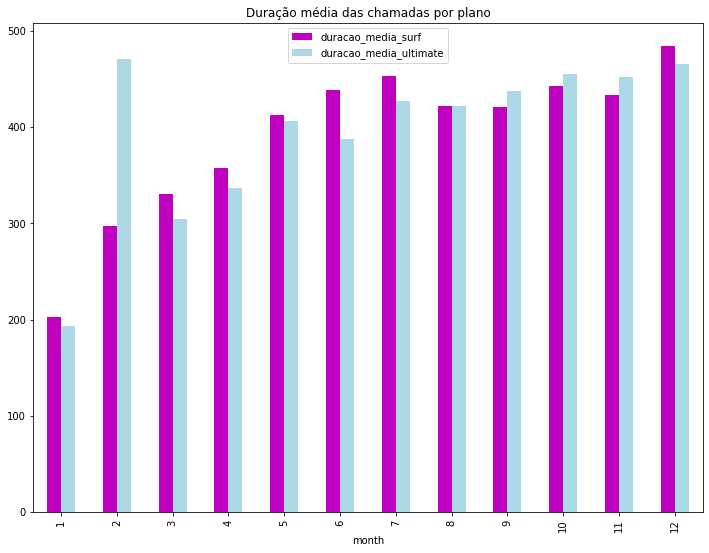

In [88]:
color = ['m', 'lightblue']
pivot_minutos.plot(kind='bar', figsize=(12, 9), title='Duração média das chamadas por plano', color=color);

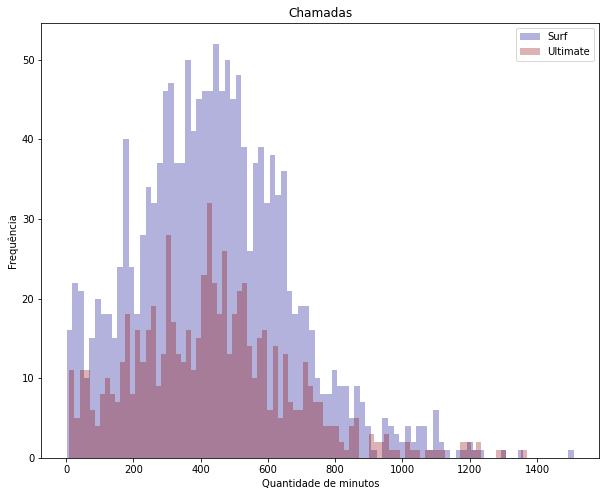

In [89]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
plot_data_surf = df_final[(df_final['plan'] == 'surf')]
plot_data_ult = df_final[(df_final['plan'] == 'ultimate')]

fig, ax = plt.subplots(figsize=(10, 8))
plot_data_surf['duration_min'].plot(kind='hist', 
                                 bins=90, 
                                 title='Chamadas', 
                                 alpha=0.3, 
                                 ax=ax, 
                                 color='darkblue')

plot_data_ult['duration_min'].plot(kind='hist', 
                                 bins=90, 
                                 title='Chamadas', 
                                 alpha=0.3, 
                                 ax=ax, 
                                 color='darkred')

plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Quantidade de minutos')
plt.ylabel('Frequência')
plt.show()

In [90]:
# Calcule a média e a variação da duração mensal das chamadas
df_final.groupby('month').agg(media_chamadas=('duration_min','mean'), 
                              variancia_chamadas=('duration_min','var')).round(2)

,media_chamadas,variancia_chamadas
month,,
1,196.67,13135.87
2,366.33,56978.38
3,321.17,43378.50
4,351.53,44930.37
5,410.77,53063.45
6,422.24,41606.68
7,444.50,64107.09
8,421.68,51591.58
9,425.78,48493.93


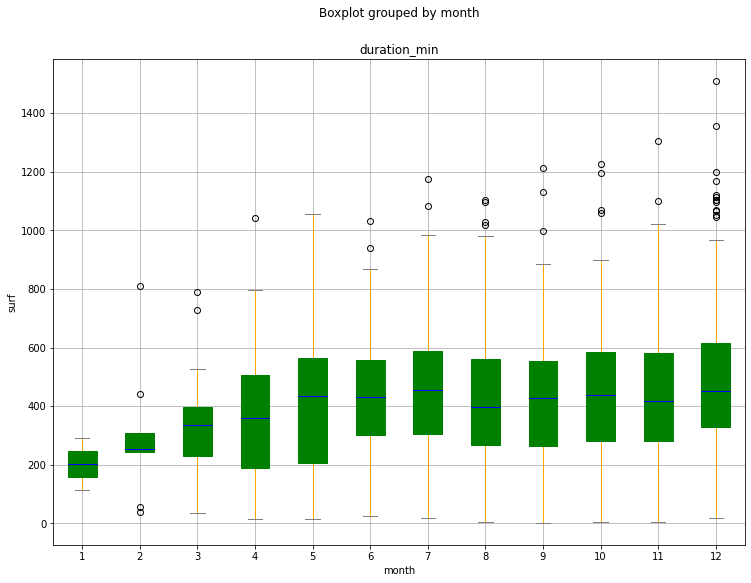

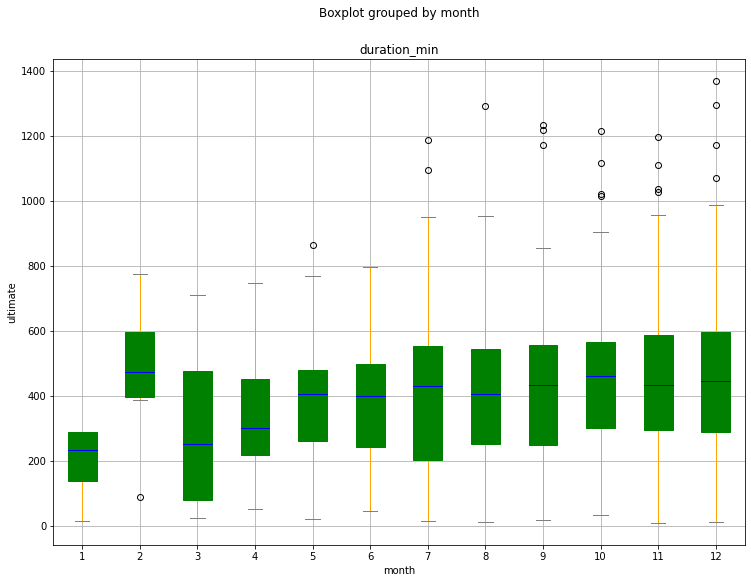

In [91]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
for plan, data in df_final.groupby('plan'):
    props = dict(boxes="green", whiskers="orange", medians="blue", caps="gray")
    data.boxplot('duration_min', by='month', grid=True, figsize=(12,9), color=props, patch_artist=True)
    plt.ylabel(plan)

O comportamento dos usuśrios de cada plano relativamente à duração das chamadas por mês é diferente nos primeiros três meses de 2018, sobretudo durante o mês de Fevereiro onde os usuários de surf tiveram uma duração aproximada de 230 minutos enquanto os usuários finais tiveram uma duração de aproximadamente 230 minutos. de 430 minutos, porém, a partir do mês 4 a duração média das chamadas oscila perto de 400 minutos por mês.

### Mensagens

In [92]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
pivot_mensagens = df_final.pivot_table(index= 'month', 
                                     columns = 'plan', 
                                     values= 'total_mensagens', 
                                     aggfunc='mean')

pivot_mensagens

plan,surf,ultimate
month,,
1,21.000000,20.666667
2,21.600000,25.166667
3,21.937500,34.714286
4,24.685714,28.937500
5,32.690909,44.333333
6,32.661972,36.289474
7,34.711111,41.212766
8,36.991803,47.929825
9,38.920000,45.901408


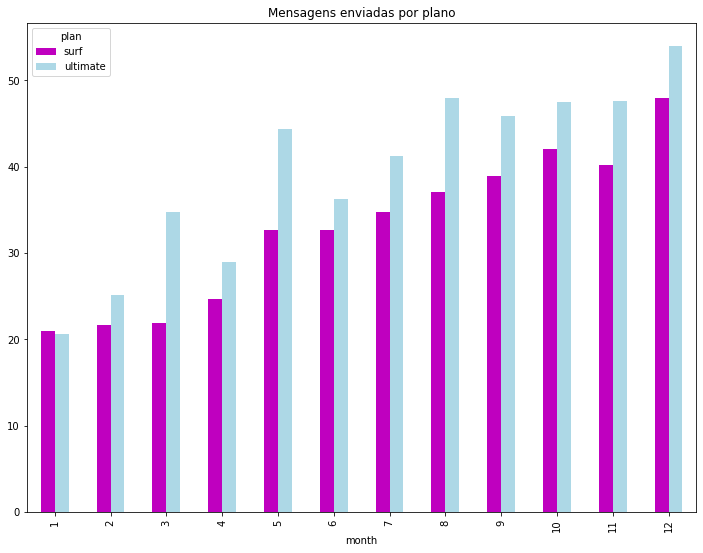

In [93]:
color = ['m', 'lightblue']
pivot_mensagens.plot(kind='bar', figsize=(12,9), title='Mensagens enviadas por plano', color=color);

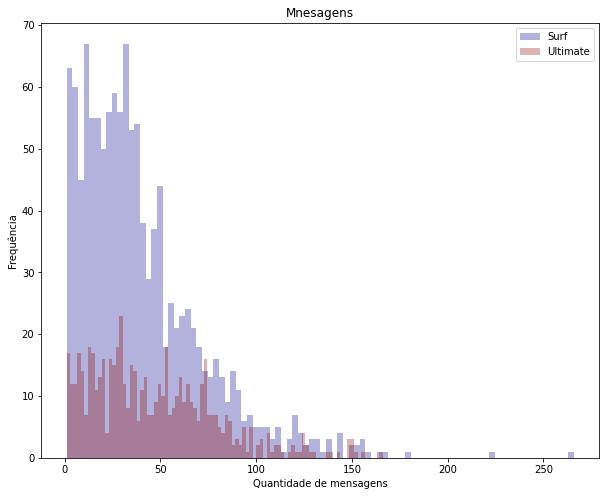

In [94]:
# Compare o número de mensagens de que os usuários de cada plano tendem a enviar a cada mês. Construa um histograma.
plot_data_surf = df_final[(df_final['plan'] == 'surf')]
plot_data_ult = df_final[(df_final['plan'] == 'ultimate')]

fig, ax = plt.subplots(figsize=(10, 8))
plot_data_surf['total_mensagens'].plot(kind='hist', 
                                 bins=90, 
                                 title='Mnesagens', 
                                 alpha=0.3, 
                                 ax=ax, 
                                 color='darkblue')

plot_data_ult['total_mensagens'].plot(kind='hist', 
                                 bins=90, 
                                 title='Mnesagens', 
                                 alpha=0.3, 
                                 ax=ax, 
                                 color='darkred')

plt.legend(['Surf', 'Ultimate'])
plt.xlabel('Quantidade de mensagens')
plt.ylabel('Frequência')
plt.show()

In [95]:
# Calcule da média e variância das mensagens enviadas mensalmente.
df_final.groupby('month').agg(media_mensagens = ('total_mensagens','mean'), variancia_mensagens = ('total_mensagens','var')).round(2)

,media_mensagens,variancia_mensagens
month,,
1,20.75,206.92
2,23.55,441.27
3,25.83,443.60
4,26.02,524.86
5,35.91,992.08
6,33.93,802.53
7,36.94,809.01
8,40.47,986.51
9,41.16,903.65


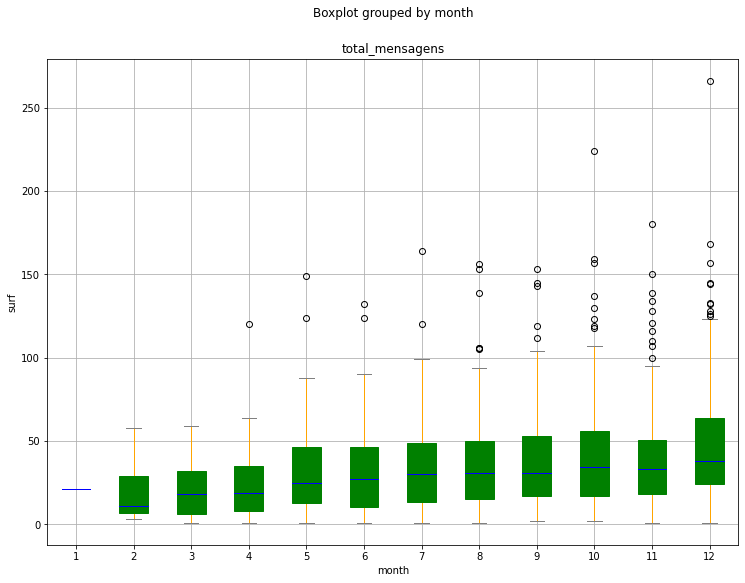

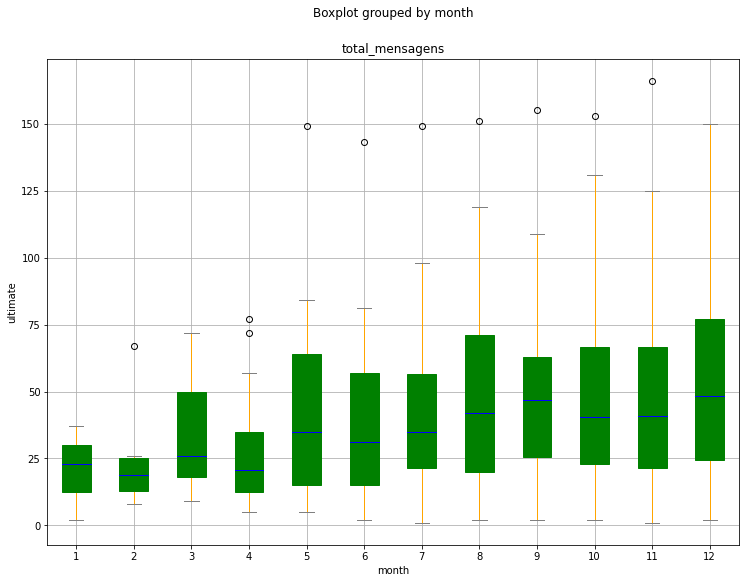

In [96]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das mensagens
for plan, data in df_final.groupby('plan'):
    props = dict(boxes="green", whiskers="orange", medians="blue", caps="gray")
    data.boxplot('total_mensagens', by='month', grid=True, figsize=(12,9), color=props, patch_artist=True)
    plt.ylabel(plan)

Embora existam ligeiras diferenças neste comportamento, pode-se afirmar que os usuários do plano ultimate enviaram mais mensagens em média (entre 24 e 50 por mês) comparativamente aos usuários de surf (25 em média por mês), durante o ano de 2018.

### Internet

In [97]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
pivot_internet = df_final.pivot_table(index= 'month', 
                                     columns = 'plan', 
                                     values= 'mb_used', 
                                     aggfunc='mean')

pivot_internet

plan,surf,ultimate
month,,
1,4874.860000,6918.092500
2,12178.843333,17128.808571
3,13345.440000,18321.518333
4,12228.778571,16121.654762
5,14119.728026,16624.482414
6,15623.666632,15337.921064
7,16923.463917,16344.744407
8,17112.224403,17814.720141
9,16677.397254,16969.869535


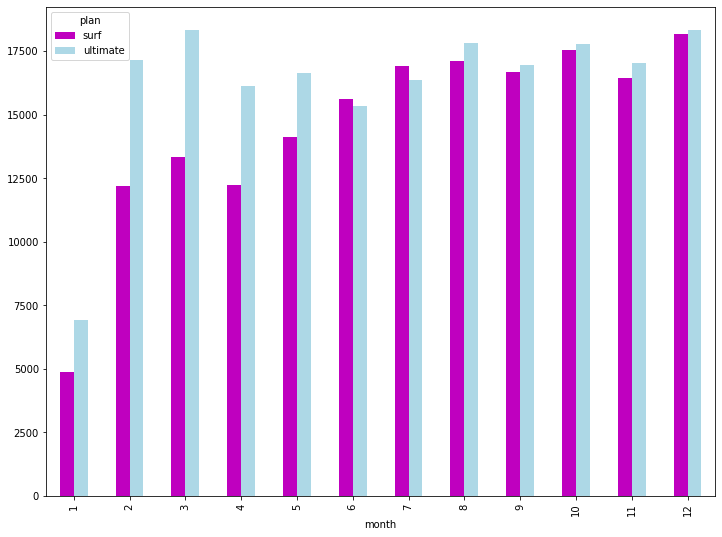

In [98]:
color = ['m', 'lightblue']
pivot_internet.plot(kind='bar', figsize=(12,9), color=color);

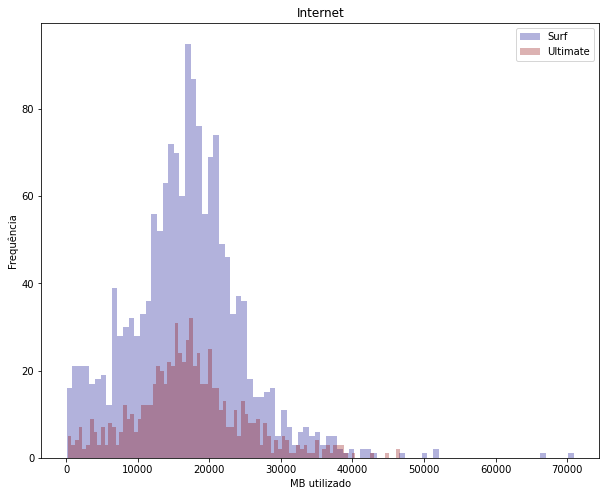

In [99]:
# Frequência de mb utilizados por plano
plot_data_surf = df_final[(df_final['plan'] == 'surf')]
plot_data_ult = df_final[(df_final['plan'] == 'ultimate')]
# color_surf = 'blue'
# color_ult = 'red'

fig, ax = plt.subplots(figsize=(10, 8))
plot_data_surf['mb_used'].plot(kind='hist', 
                                 bins=90, 
                                 title='Internet', 
                                 alpha=0.3, 
                                 ax=ax, 
                                 color='darkblue')

plot_data_ult['mb_used'].plot(kind='hist', 
                                 bins=90, 
                                 title='Internet', 
                                 alpha=0.3, 
                                 ax=ax, 
                                 color='darkred')

plt.legend(['Surf', 'Ultimate'])
plt.xlabel('MB utilizado')
plt.ylabel('Frequência')
plt.show()

In [100]:
# Calcule de média e variância para utilização de dados mensais.
df_final.groupby('month').agg(media_mb_used = ('mb_used','mean'), variacia_mb_used = ('mb_used','var')).round(2)

,media_mb_used,variacia_mb_used
month,,
1,6237.02,14598097.76
2,14344.45,44783699.21
3,15051.52,95305707.63
4,13396.64,68666565.20
5,14811.52,59588963.81
6,15529.09,53573824.50
7,16732.71,64381518.37
8,17329.08,67291599.66
9,16767.55,49734958.99


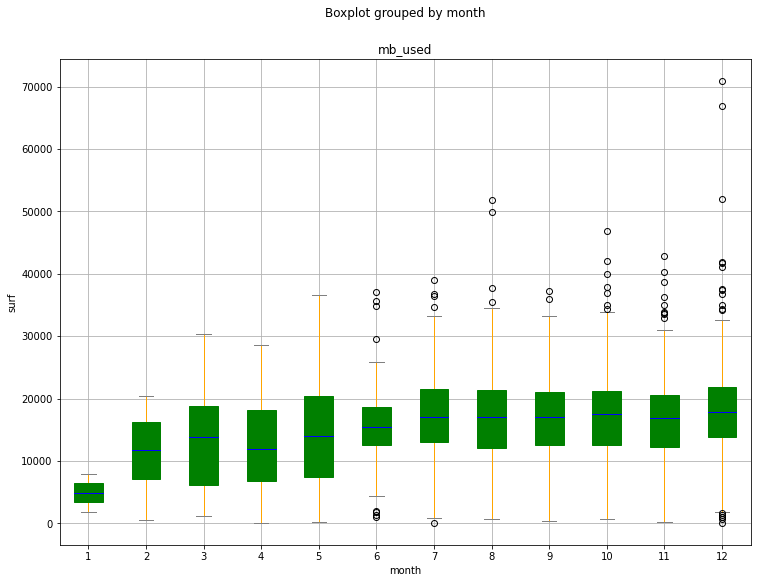

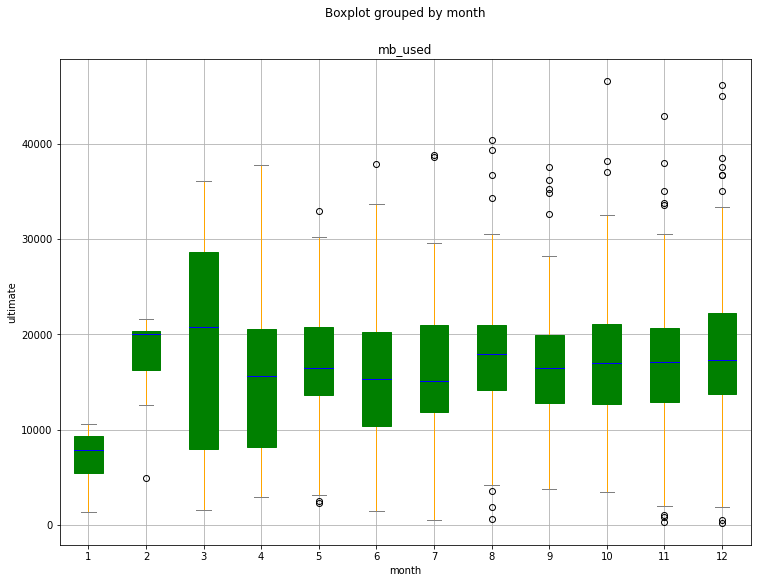

In [101]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal do total de dados utilizados por plano
for plan, data in df_final.groupby('plan'):
    props = dict(boxes="green", whiskers="orange", medians="blue", caps="gray")
    data.boxplot('mb_used', by='month', grid=True, figsize=(12,9), color=props, patch_artist=True)
    plt.ylabel(plan)

Relativamente à utilização de internet por plano, é um pouco mais difícil garantir que existe um comportamento diferente, uma vez que a utilização de megabytes para ambos os planos varia entre 14.000 e 17.000 megabytes.

## Receita

In [113]:
# Comparativo da renda mensal por tipo de plano
pivot_receita = df_final.pivot_table(index= 'month', 
                                     columns = 'plan', 
                                     values= 'total_mes', 
                                     aggfunc='mean')

pivot_receita

plan,surf,ultimate
month,,
1,20.000000,70.0
2,34.396667,70.0
3,45.941304,70.0
4,41.133265,70.0
5,47.991316,70.0
6,49.845895,70.0
7,62.999417,70.0
8,64.727799,70.0
9,58.457358,70.0


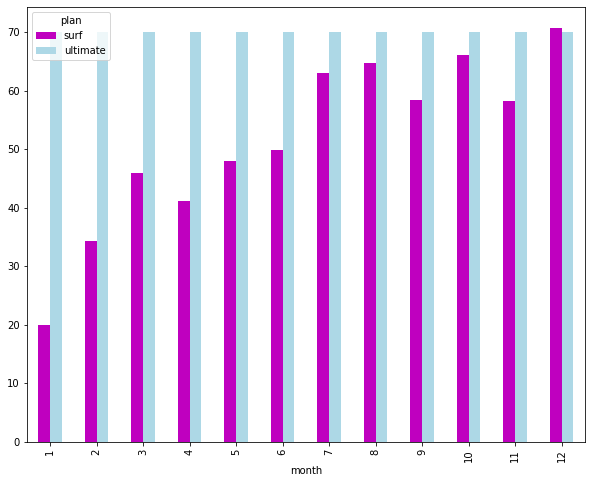

In [114]:
color = ['m', 'lightblue']
pivot_receita.plot(kind='bar', figsize=(10,8), color=color);

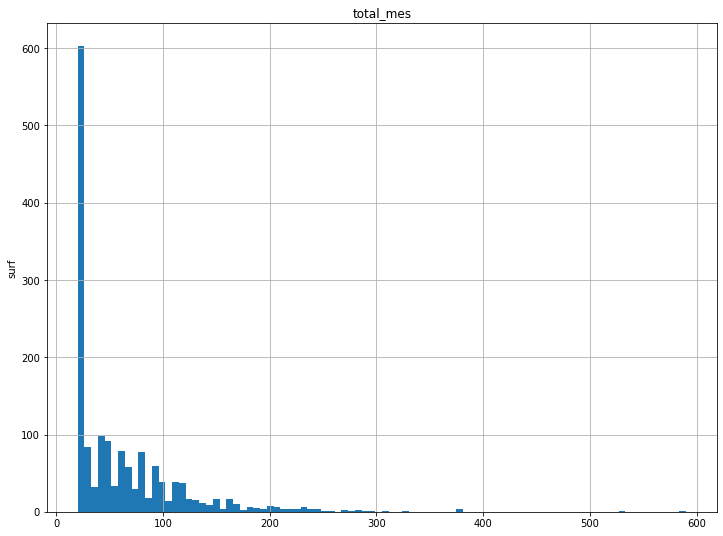

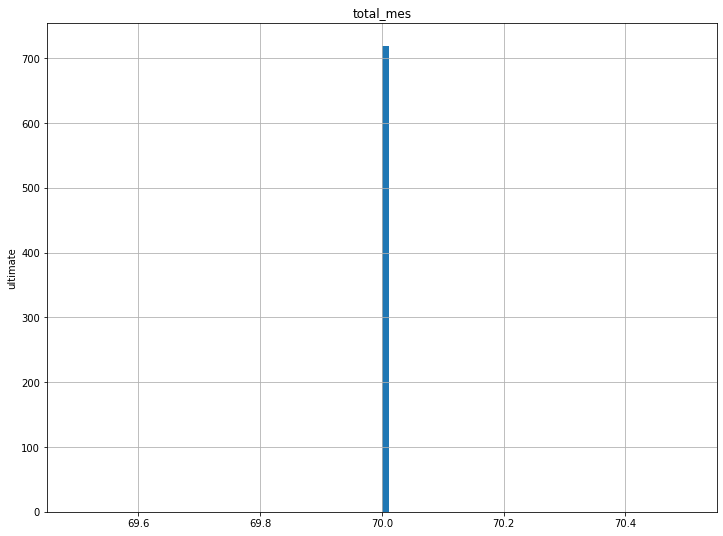

In [104]:
# Frequência de renda mensal por tipo de plano
for plan, data in df_final.groupby('plan'):
    data.hist('total_mes', grid=True, bins=90, figsize= (12, 9))
    plt.ylabel(plan)

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Preciso sobrepor esses histogramas?
</div>


In [105]:
df_final.groupby('month').agg(media_renda = ('total_mes','mean'), variancia_renda = ('total_mes','var')).round(2)

,media_renda,variancia_renda
month,,
1,53.33,666.67
2,49.97,561.16
3,54.19,1112.62
4,49.79,1022.62
5,54.07,1528.16
6,56.52,1434.06
7,65.31,1986.56
8,66.36,2504.30
9,62.02,1593.30


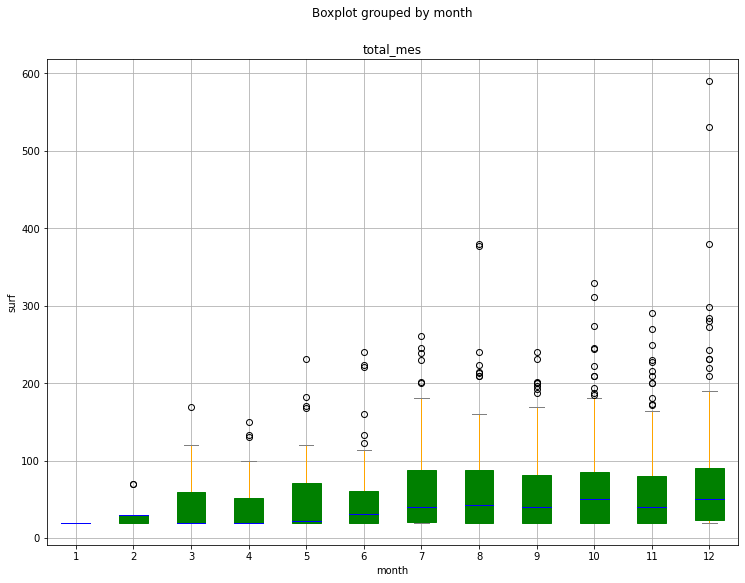

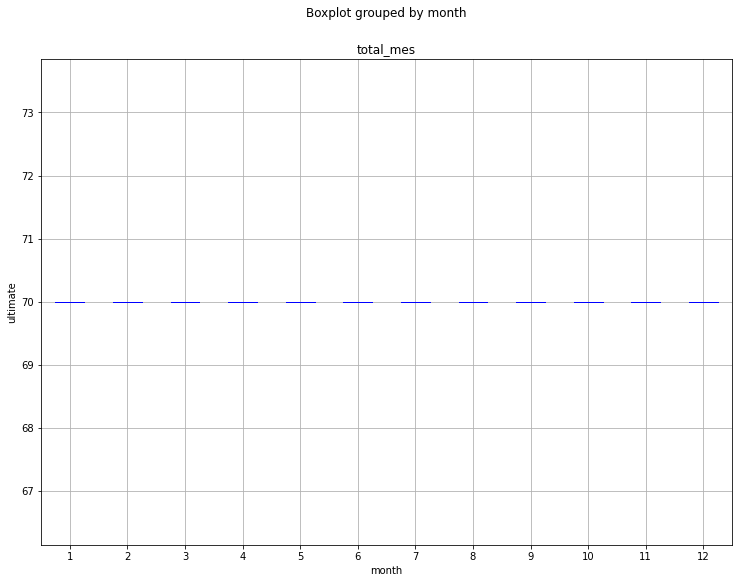

In [106]:
for plan, data in df_final.groupby('plan'):
    props = dict(boxes="green", whiskers="orange", medians="blue", caps="gray")
    data.boxplot('total_mes', by= 'month', grid=True, figsize=(12,9), color=props, patch_artist=True)
    plt.ylabel(plan)

Os usuários do plano de surf tendem a ultrapassar os limites do seu plano com mais frequência, pelo que o custo por vezes aumenta até duplicar o seu custo original, no entanto, estes casos são relativamente poucos; por outro lado, a receita do plano final é mais consistente, sendo extremamente difícil para os usuários deste plano ultrapassar os limites do seu serviço.

## Teste das hipóteses estatísticas

Para a **Hipótese 1**, temos:

* Hipótese nula — H1_0: A receita média dos usuários dos planos ultimate e surf são iguais.
* Hipótese alternativa — H1_1: A receita média dos usuários dos planos ultimate e surf são diferentes.

Os testes escolhidos foram o teste de Levene para verificar a igualdade das variâncias antes de realizar o ttest_ind. 

O valor do alfa escolhido foi 5%.

In [107]:
# Separando as amostras e definindo o alpha
amostra_1 = df_final.query('plan == "surf"')['total_mes']
amostra_2 = df_final.query('plan == "ultimate"')['total_mes']

alpha = 0.05

In [108]:
# Verificando a variância das amostras, usando o teste de levene
statistic, p_value = st.levene(amostra_1, amostra_2)

print("Estatística do teste de Levene:", statistic)
print("p-valor do teste de Levene:", p_value)

if p_value < alpha:
    print("As variâncias são significativamente diferentes.")
else:
    print("Não há evidência significativa de diferença nas variâncias.")

Estatística do teste de Levene: 477.5732373516375
p-valor do teste de Levene: 2.925576164535741e-96
As variâncias são significativamente diferentes.


In [109]:
# Realizando teste de hipóteses com t-test com alpha 5%
alpha = 0.05

# Aplicando t student com definindo que as variâncias são diferentes
t_statistic, p_value = st.ttest_ind(amostra_1, amostra_2, equal_var=False)

print(f'P-Value: {p_value}')

if p_value < alpha:
     print("Rejeitamos a hipótese nula (H0): A receita média dos usuários dos planos Ultimate e Surf são diferentes.")
else:
    print("NÃO rejeitamos a hipótese nula (H0): Não há evidência suficiente para concluir que a receita média dos usuários dos planos Ultimate e Surf são diferentes.")

P-Value: 2.9516651548886127e-10
Rejeitamos a hipótese nula (H0): A receita média dos usuários dos planos Ultimate e Surf são diferentes.


Já para a **Hipótese 2**, temos:

* Hipótese nula — H2_0: A receita média dos usuários da área de NY-NJ é igual a receita dos usuários de outras cidades.
* Hipótese alternativa — H2_1: A receita média dos usuários da área de NY-NJ é diferente a receita dos usuários de outras cidades.

Os testes escolhidos foram o teste de Levene para verificar a igualdade das variâncias antes de realizar o ttest_ind. 

O valor do alfa escolhido foi 5%.

In [110]:
# Separando as amostras e definindo alpha
alpha = 0.05

amostra_1 = df_final[df_final['city'].str.contains('NY-NJ')]['total_mes']
amostra_2 = df_final.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['total_mes']

In [111]:
# Aplicando novamente o teste de levene nas amostras
statistic, p_value = st.levene(amostra_1, amostra_2)

print("Estatística do teste de Levene:", statistic)
print("p-valor do teste de Levene:", p_value)

if p_value < alpha:
    print("As variâncias são significativamente diferentes.")
else:
    print("Não há evidência significativa de diferença nas variâncias.")


Estatística do teste de Levene: 2.3851644025112475
p-valor do teste de Levene: 0.12263108796825262
Não há evidência significativa de diferença nas variâncias.


In [112]:
# Realizando teste de hipóteses com t-test e igualando as variâncias, equal_var = True

# Testando as hipóteses com alpha 5%
alpha = 0.05

results = st.ttest_ind(amostra_1, amostra_2, equal_var=True)

print("p-valor:", results.pvalue)

if results.pvalue < alpha:
    print("Rejeitar a hipótese nula.")
    print("Há evidências estatísticas de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.")
else:
    print("Não rejeitar a hipótese nula.")
    print("Não há evidências estatísticas suficientes para concluir que a receita média difere entre os grupos.")

p-valor: 0.025358678125259784
Rejeitar a hipótese nula.
Há evidências estatísticas de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.


## Conclusão geral

Inicialmente foi realizado uma descrição dos dados e DataFrames disponíveis. Após as análises iniciais do DataFrame, foram feitas correções ao nível de tipo dos dados.

Foi necessário um refinamento dos dados, tanto para adicionar novas variáveis que facilitassem nossas análises, como os excedentes de consumo como o mês vinculado a cada receita dos clientes. Posteriormente foi necessário criar um DataFrame que fosse a junção de todos os outros necessários para a realização do estudo.

Os valores ausentes foram tratados, com exceção de uma variável, churn_date, que não era relevante para a concretização do estudo. Os outros valores ausentes foram substituídos por zero (0), uma vez que a ausência de consumo implica na não utilização. Após o refinamento, seguimos para as análises dos dados.

O comportamento e consumo dos clientes foram descritos. Também foi possível sugerir políticas de negócios e ações a serem tomadas pela empresa, visando uma maior fidelização e experiência de usuário para seus clientes, junto as suas próprias necessidades. A análise dos dados seguiu com a visualização em gráficos de histogramas e dispersão, tanto da visualização da receita, consumo e excedentes dos clientes, quanto da visualização da receita por idades e por cidades de residência dos usuários. Medidas de desvio padrão, variância, média e mediana foram realizadas para todo o DataFrame.

**De acordo com o que foi observado no comportamento dos usuários em cada plano:**

* O uso da Internet é o mesmo em ambos os planos. 
* As principais diferenças encontram-se no número de mensagens enviadas e no total de minutos utilizados nas chamadas; para estas categorias, os usuários do **plano ultimate** tiveram maior atividade em comparação com os usuários do **plano surf**.


**Em relação às hipóteses:**

**HIPÓTESE 1**
* Foi realizado um teste de hipótese com alpha de 5% no qual resultou na informação de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.
* Aplicado também o teste de levene onde verificamos que as variâncias das amostras eram significativamente diferentes.

**HIPÓTESE 2**
* A hipótese 2, levantava a questão de que a receita média gerada pelos usuários das regiões NY e NJ eram diferentes aos de outras regiões, na qual foi confirmada via t-test e o método levene de que sim, há evidências estatísticas de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.
 

**Conclusão de negócios:**

Relativamente ao problema empresarial a resolver inicialmente colocado, a que plano deverão ser dedicados mais esforços publicitários? 

Pode-se concluir que a melhor opção para tal é aumentar a publicidade do **plano surf**, pois, embora geralmente gere receitas semelhantes às do **plano ultimate**, os usuários deste plano tendem a ultrapassar mais frequentemente os limites do seu plano, o que se traduz em "receita excedente" para a empresa.